<a href="https://colab.research.google.com/github/isabelesb/RegressaoLinear-PrecoCarros/blob/main/Regress%C3%A3o_Linear_Pre%C3%A7o_dos_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importando as Bibliotecas Necessárias:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

###Importação dos Dados e Análise Descritiva:



In [4]:
df = pd.read_csv('/content/Cópia de CarPrice_Assignment.csv')

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


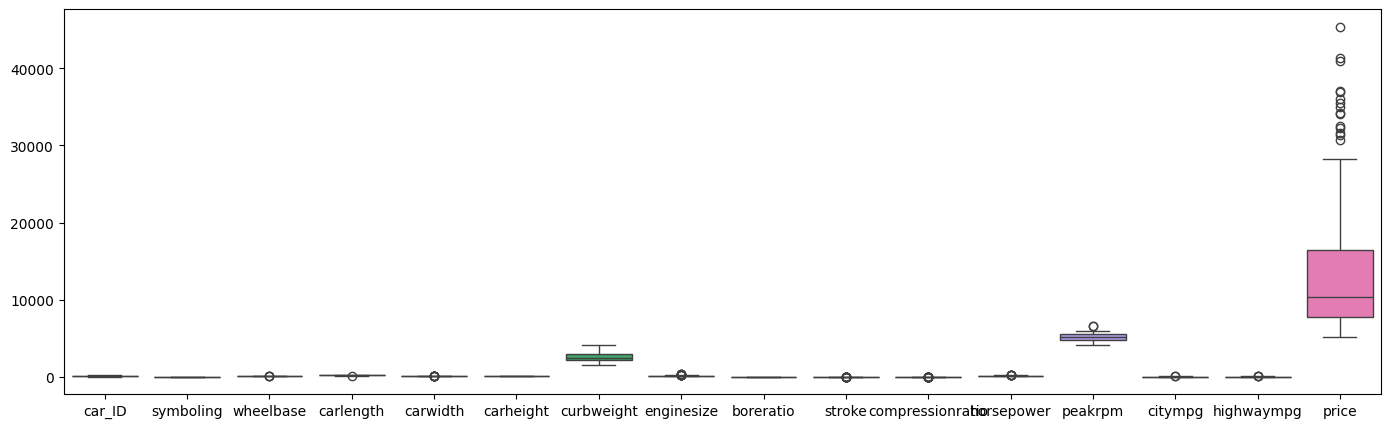

In [15]:
sns.boxplot(df).figure.set_size_inches(17,5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.duplicated().sum()

0

* Os dados mostram discrepâncias entre as colunas, então precisaremos normalizar.
* Não há outliers fora do esperado.
* Não há dados nulos.
* Há várias variáveis categóricas, que precisaremos modificar para utilizar a regressão linear.
* Não há variáveis duplicadas.

### Tratando os dados:

In [16]:
# Tratamento das variáveis categóricas
le = LabelEncoder()

# Nome do carro
le.fit(df.CarName)
df.CarName = le.transform(df.CarName)
# Tipo de combustível
le.fit(df.fueltype)
df.fueltype = le.transform(df.fueltype)
# Aspiração
le.fit(df.aspiration)
df.aspiration = le.transform(df.aspiration)
# Número de portas
le.fit(df.doornumber)
df.doornumber = le.transform(df.doornumber)
# "Corpo" do carro
le.fit(df.carbody)
df.carbody = le.transform(df.carbody)
# Volante
le.fit(df.drivewheel)
df.drivewheel = le.transform(df.drivewheel)
# Localização do motor
le.fit(df.enginelocation)
df.enginelocation = le.transform(df.enginelocation)
# Sistema de combustível
le.fit(df.fuelsystem)
df.fuelsystem = le.transform(df.fuelsystem)
# Tipo de motor
le.fit(df.enginetype)
df.enginetype = le.transform(df.enginetype)
# Número de cinlindro
le.fit(df.cylindernumber)
df.cylindernumber = le.transform(df.cylindernumber)

In [19]:
# Normalização
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

###Análise Exploratória:

In [21]:
df_norm.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


* Aqui eu apliquei ols do statsmodels.formula para escolher quais variáveis utilizar no modelo, de acordo com o p-value. O limite é 0.1.
* As variáveis a serem adicionadas seguiram a ordem decrescente do índice de correlação, analisado anteriormente.

In [22]:
function = 'price~enginesize+curbweight'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           3.77e-70
Time:                        22:25:13   Log-Likelihood:                 203.51
No. Observations:                 205   AIC:                            -401.0
Df Residuals:                     202   BIC:                            -391.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1182      0.015     -8.122      0.0

In [23]:
function = 'price~enginesize+curbweight+carwidth'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     267.8
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           6.08e-70
Time:                        22:26:06   Log-Likelihood:                 206.19
No. Observations:                 205   AIC:                            -404.4
Df Residuals:                     201   BIC:                            -391.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1424      0.018     -7.995      0.0

In [24]:
function = 'price~enginesize+curbweight+carwidth+carlength'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.9
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.21e-69
Time:                        22:26:32   Log-Likelihood:                 207.82
No. Observations:                 205   AIC:                            -405.6
Df Residuals:                     200   BIC:                            -389.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1279      0.019     -6.567      0.0

In [25]:
function = 'price~enginesize+curbweight+carwidth+carlength+carbody'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     168.4
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.79e-69
Time:                        22:27:06   Log-Likelihood:                 210.86
No. Observations:                 205   AIC:                            -409.7
Df Residuals:                     199   BIC:                            -389.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0904      0.025     -3.674      0.0

In [26]:
function = 'price~enginesize+curbweight+carwidth+carbody'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.37e-70
Time:                        22:28:25   Log-Likelihood:                 210.68
No. Observations:                 205   AIC:                            -411.4
Df Residuals:                     200   BIC:                            -394.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0908      0.025     -3.696      0.0

In [27]:
function = 'price~enginesize+curbweight+carwidth+carbody+wheelbase'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.61e-69
Time:                        22:29:53   Log-Likelihood:                 210.97
No. Observations:                 205   AIC:                            -409.9
Df Residuals:                     199   BIC:                            -390.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0975      0.026     -3.718      0.0

##Modelo:
* As variáveis escolhidas foram: enginesize, curbweight, carwidth e carbody.

In [31]:
lr = LinearRegression()
# Definindo as variáveis explicativas e o target.
x= df_norm[['enginesize','curbweight','carwidth','carbody']]
y= df_norm[['price']]
# Separando os intervalos de treinamento e de teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Treinando e analisando R².
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
# Fazendo a predição no intervalo de treinamento e avaliando.
y_pred_train = lr.predict(x_train)
print('MAE-treinamento :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE-treinamento :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSA-treinamento :', np.sqrt(metrics.mean_absolute_error(y_train, y_pred_train)))

# Fazendo a predição no intervalo de teste e avaliando.
y_pred = lr.predict(x_test)
print('MAE-teste :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE-teste :', metrics.mean_squared_error(y_test, y_pred))
print('RMSA-teste :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE-treinamento : 0.06126766092948191
MSE-treinamento : 0.007076279241921741
RMSA-treinamento : 0.24752305130933142
MAE-teste : 0.06535357885121093
MSE-teste : 0.009395439950540128
RMSA-teste : 0.25564346041158753


* A diferença entre as métricas para o treinamento e para o teste são pequenas, então concluimos que este é um bom modelo.